In [36]:
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

X, y = geradataset(20)
X, y

(array([[0.57580621, 0.64751274],
        [0.11390249, 0.82956735],
        [0.71119793, 0.55335536],
        [0.29428433, 0.60312127],
        [0.08624462, 0.33881308],
        [0.84977945, 0.55461791],
        [0.51298347, 0.52573956],
        [0.7885813 , 0.83506728],
        [0.63542741, 0.6890553 ],
        [0.60126528, 0.92934893],
        [0.5769061 , 0.54897997],
        [0.12536602, 0.18104901],
        [0.50475197, 0.580115  ],
        [0.61717493, 0.2872348 ],
        [0.60841943, 0.78370373],
        [0.60996472, 0.16024697],
        [0.00531483, 0.62469029],
        [0.30261418, 0.10166422],
        [0.19489461, 0.26575483],
        [0.97661709, 0.22732389]]),
 array([-1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
         1, -1,  1]))

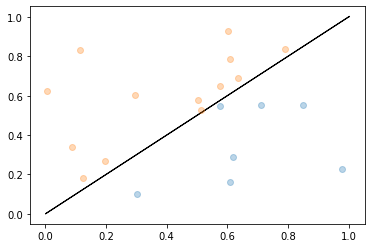

In [37]:
import matplotlib.pyplot as plt

def plotadataset(X, y):
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotadataset(X, y)

def plotavetor(vetor, cor="k"):
    origem = [0,0]
    plt.arrow(*origem, *vetor, color=cor)

vetor = [1, -1]

def perpendicular(vetor):
    perp = np.array(vetor[::-1])
    perp[0] *= -1
    return perp

hiperplano = perpendicular(vetor)

plotavetor(hiperplano)

In [39]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron()):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = 0.1
        self.maxiter = 100
        self.custo = custo

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=2)
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, X)
            if custo==0:
                break
    
    def preactivate(self, X):
        return np.matmul(X, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))


55.99272428874677
41.31666450066811
39.83084814076312
37.32793742883314
35.532144311097916
34.07645905096735
32.921726411357405
32.00102625926968
31.266600677930388
30.679927566526956
30.21062739941741
29.83463271918965
29.532881949814907
29.290268188477164
29.094811989573877
28.937007648053054
28.809306885239252
28.705710921467944
28.621448119046075
28.552719181170858
28.49649569327673
28.450360789899957
28.412383094498672
28.381016944982818
28.35502338943138
28.33340759770864
28.315369250999936
28.300263194377123
28.287568208164235
28.27686220427445
28.26780250920948
28.26011017606991
28.25355748951064
28.247958002547342
28.24315858230495
28.239033050950738
28.235477094289934
28.23240417864689
28.229742270517587
28.22743119606604
28.22542051121721
28.223667779745924
28.22213717785106
28.2207983604034
28.2196255372842
28.218596718717148
28.21769309681219
28.216898537139656
28.216199159394694
28.215582990378515
28.21503967583816
28.214560240346124
28.21413688650677
28.213762826456165
2

In [40]:
perceptron = Perceptron(custo=CustoPerceptron())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

52
28
28
48
28
4
4
4
4
4
8
12
24
20
4
0
1.0


In [41]:
perceptron = Perceptron(custo=HingeLoss())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

18
14
2
0
1.0
